## Assignment Details:- Finding closing price for these stocks for last 90days. 

In [1]:
# Importing required libraries

import pandas as pd  # To handle data frames in Python
import numpy as np   # TO deal with numerical values
import matplotlib.pyplot as plt  # To plot the data into graphs
import datetime # To manipulate date and times
from pandas.plotting import scatter_matrix # To get scatter materix of data

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installing yfinance to download Stock data
#!pip install yfinance 

In [3]:
import yfinance as yf

### Loading the dataset

In [4]:
df = pd.read_excel ('List of Stocks case study.xlsx')
print (df)

         Stock Name                        SYMBOL    
0    ACC LIMITED                           ACC       
1    ADANI PORT & SEZ LTD                  ADANIPORTS
2    ADANI ENTERPRISES LIMITED             ADANIENT  
3    ADANI POWER LTD                       ADANIPOWER
4    AMBUJA CEMENTS LTD                    AMBUJACEM 
..                                    ...         ...
156  PVR LIMITED                           PVR       
157  TATA CHEMICALS LTD                    TATACHEM  
158  TATA MOTORS LIMITED                   TATAMOTORS
159  TATA MOTORS DVR 'A' ORD               TATAMTRDVR
160  SUN TV NETWORK LIMITED                SUNTV     

[161 rows x 2 columns]


In [5]:
# Getting the first 5 dataset
df.head()

,Stock Name,SYMBOL
0,ACC LIMITED,ACC
1,ADANI PORT & SEZ LTD,ADANIPORTS
2,ADANI ENTERPRISES LIMITED,ADANIENT
3,ADANI POWER LTD,ADANIPOWER
4,AMBUJA CEMENTS LTD,AMBUJACEM


In [6]:
#Getting last 5 dataset
df.tail()

,Stock Name,SYMBOL
156,PVR LIMITED,PVR
157,TATA CHEMICALS LTD,TATACHEM
158,TATA MOTORS LIMITED,TATAMOTORS
159,TATA MOTORS DVR 'A' ORD,TATAMTRDVR
160,SUN TV NETWORK LIMITED,SUNTV


In [7]:
# Idetifying columns of the dataset
df.columns

Index(['Stock Name                      ', 'SYMBOL    '], dtype='object')

In [8]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Stock Name                        161 non-null    object
 1   SYMBOL                            161 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [9]:
# Statistical analysis of the dataset, although we do not require here.
df.describe()

,Stock Name,SYMBOL
count,161,161
unique,161,161
top,MRF LTD,YESBANK
freq,1,1


In [10]:
# Finding if we have null dataset

df.isnull().sum()

Stock Name                          0
SYMBOL                              0
dtype: int64

In [11]:
df

,Stock Name,SYMBOL
0,ACC LIMITED,ACC
1,ADANI PORT & SEZ LTD,ADANIPORTS
2,ADANI ENTERPRISES LIMITED,ADANIENT
3,ADANI POWER LTD,ADANIPOWER
4,AMBUJA CEMENTS LTD,AMBUJACEM
...,...,...
156,PVR LIMITED,PVR
157,TATA CHEMICALS LTD,TATACHEM
158,TATA MOTORS LIMITED,TATAMOTORS
159,TATA MOTORS DVR 'A' ORD,TATAMTRDVR


#### Conclusion:- Here we have dataset with 161 rows and 2 columns, we do not have null values and as we have column of "Symbol", let's explore the dataset and have the desired outcome, 

In [12]:
df.loc[:,'SYMBOL    ']

0      ACC       
1      ADANIPORTS
2      ADANIENT  
3      ADANIPOWER
4      AMBUJACEM 
          ...    
156    PVR       
157    TATACHEM  
158    TATAMOTORS
159    TATAMTRDVR
160    SUNTV     
Name: SYMBOL    , Length: 161, dtype: object

In [13]:
df1 = df['SYMBOL    '].tolist()

In [14]:
df1

['ACC       ',
 'ADANIPORTS',
 'ADANIENT  ',
 'ADANIPOWER',
 'AMBUJACEM ',
 'APOLLOHOSP',
 'ARVIND    ',
 'ASIANPAINT',
 'AUROPHARMA',
 'BAJFINANCE',
 'BALKRISIND',
 'BANKBARODA',
 'BANKINDIA ',
 'BERGEPAINT',
 'BHEL      ',
 'BAJAJFINSV',
 'BOSCHLTD  ',
 'CADILAHC  ',
 'CENTURYTEX',
 'CHOLAFIN  ',
 'CUMMINSIND',
 'DIVISLAB  ',
 'DLF       ',
 'ENGINERSIN',
 'EQUITAS   ',
 'ESCORTS   ',
 'FEDERALBNK',
 'GODREJCP  ',
 'GRASIM    ',
 'HAVELLS   ',
 'HCLTECH   ',
 'BSOFT     ',
 'HDFCBANK  ',
 'HEXAWARE  ',
 'HINDPETRO ',
 'CANBK     ',
 'HINDZINC  ',
 'IDEA      ',
 'IDFCFIRSTB',
 'CASTROLIND',
 'INDIGO    ',
 'INDUSINDBK',
 'INFY      ',
 'IOC       ',
 'DHFL      ',
 'ITC       ',
 'JINDALSTEL',
 'EICHERMOT ',
 'JSWSTEEL  ',
 'JUBLFOOD  ',
 'JUSTDIAL  ',
 'KOTAKBANK ',
 'EXIDEIND  ',
 'L&TFH     ',
 'LUPIN     ',
 'M&M       ',
 'GLENMARK  ',
 'MARICO    ',
 'MCDOWELL-N',
 'MCX       ',
 'MOTHERSUMI',
 'MRF       ',
 'MUTHOOTFIN',
 'NATIONALUM',
 'NCC       ',
 'ICICIPRULI',
 'NESTLEIN

In [15]:
tickers_list = ['ACC','ADANIPORTS','ADANIENT','ADANIPOWER','AMBUJACEM','APOLLOHOSP','ARVIND','ASIANPAINT','AUROPHARMA','BAJFINANCE','BALKRISIND','BANKBARODA','BANKINDIA','BERGEPAINT','BHEL','BAJAJFINSV','BOSCHLTD','CADILAHC','CENTURYTEX','CHOLAFIN','CUMMINSIND','DIVISLAB','DLF','ENGINERSIN','EQUITAS','ESCORTS','FEDERALBNK','GODREJCP','GRASIM','HAVELLS','HCLTECH ','BSOFT','HDFCBANK', 'HEXAWARE','HINDPETRO','CANBK','HINDZINC','IDEA','IDFCFIRSTB','CASTROLIND','INDIGO','INDUSINDBK','INFY','IOC','DHFL','ITC','JINDALSTEL','EICHERMOT','JSWSTEEL','JUBLFOOD','JUSTDIAL','KOTAKBANK','EXIDEIND','L&TFH','LUPIN','M&M','GLENMARK','MARICO','MCDOWELL-N','MCX','MOTHERSUMI','MRF','MUTHOOTFIN','NATIONALUM','NCC ','ICICIPRULI','NESTLEIND','NTPC','ONGC','PAGEIND','INFRATEL','PFC','PIDILITIND','PNB','RAMCOCEM','RAYMOND','RECLTD','RELCAPITAL','RELIANCE','SAIL','SIEMENS','SRF','SRTRANSFIN','STAR','TATAGLOBAL','TATAPOWER','TCS','MGL','TECHM','MINDTREE','TORNTPOWER','UBL','UJJIVAN','UNIONBANK','UPL','VEDL','VOLTAS','WIPRO','YESBANK','AMARAJABAT','NIITTECH','RELINFRA','APOLLOTYRE','AXISBANK','TITAN','ASHOKLEY','BAJAJ-AUTO','BATAINDIA','BEL','BHARATFORG','BIOCON','BPCL','BRITANNIA','CESC','CIPLA','COALINDIA','DABUR','DISHTV','GAIL','GMRINFRA','HDFC','HEROMOTOCO','CONCOR','HINDALCO','DRREDDY','HINDUNILVR','IBULHSGFIN','IDBI','IGL','MANAPPURAM','MFSL','M&MFIN','MARUTI','OFSS','NMDC','OIL','POWERGRID','RBLBANK','SHREECEM','SUNPHARMA','TATASTEEL','TATAELXSI','TORNTPHARM','TVSMOTOR','ULTRACEMCO','ZEEL','COLPAL','ICICIBANK','LICHSGFIN','SBIN','BHARTIARTL','LT','NBCC','KAJARIACER','PEL','PETRONET','PVR','TATACHEM','TATAMOTORS','TATAMTRDVR','SUNTV']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, period = '3mo')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  161 of 161 completed

151 Failed downloads:
- PIDILITIND: No data found, symbol may be delisted
- UPL: No data found, symbol may be delisted
- NESTLEIND: No data found, symbol may be delisted
- BEL: No data found, symbol may be delisted
- NATIONALUM: No data found, symbol may be delisted
- RAYMOND: No data found, symbol may be delisted
- MINDTREE: No data found, symbol may be delisted
- YESBANK: No data found, symbol may be delisted
- BAJAJ-AUTO: No data found, symbol may be delisted
- INFRATEL: No data found, symbol may be delisted
- SRTRANSFIN: No data found, symbol may be delisted
- HAVELLS: No data found, symbol may be delisted
- PNB: No data found for this date range, symbol may be delisted
- CONCOR: No data found, symbol may be delisted
- PVR: No data found for this date range, symbol may be delisted
- EXIDEIND: No data found, symbol may be delisted
- SHREECEM: No data found, symbol may be delisted
- BAJFINANCE: No data found, s

[5 rows x 161 columns]


## Here we can see that some of the stock price is unable to download, so I will go ahead with whatever we have and get the outcome.

In [16]:
# Getting the details of 90 days price of stock
import pandas as pd
tickers_list = ['ACC', 'INFY', 'PFC', 'VEDL', 'TCS', 'OIL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, period = '3mo')['Adj Close']

# Print first 5 rows of the data
print(data)

[*********************100%***********************]  6 of 6 completed
                  ACC       INFY        OIL        PFC    TCS       VEDL
Date                                                                    
2021-07-14  49.341450  21.389999  21.410000  26.531952  11.09  13.698211
2021-07-15  49.757416  21.129999  21.129999  27.057043  10.95  13.604000
2021-07-16  50.024818  20.860001  21.129999  26.512136  10.47  13.528632
2021-07-19  48.360962  20.639999  19.809999  25.838436  10.50  13.038737
2021-07-20  50.074345  20.940001  19.959999  27.027321  10.95  12.953948
...               ...        ...        ...        ...    ...        ...
2021-10-08  50.110001  21.930000  24.129999  32.290001  10.03  15.410000
2021-10-11  50.400002  21.820000  24.490000  31.719999   9.97  16.020000
2021-10-12  50.939999  21.879999  24.370001  32.080002   9.88  16.780001
2021-10-13  51.369999  22.650000  24.309999  31.670000   9.84  17.059999
2021-10-14  51.799999  22.584999  24.506300  31.650000 

# Exploratory Data Analysis

In [17]:
start = "2021-06-01"
end = '2021-09-30'
oil = yf.download('OIL',start,end)
infy = yf.download('INFY',start,end)
pfc = yf.download('PFC',start,end)
tcs = yf.download('TCS',start,end)
vedl = yf.download('VEDL',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


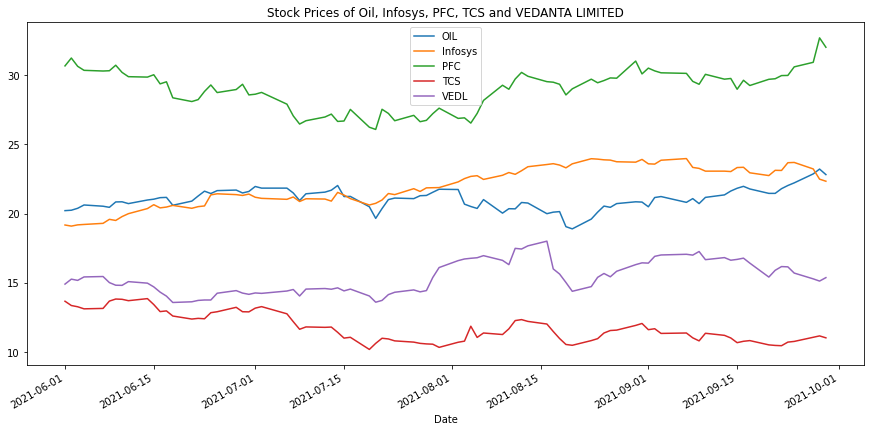

In [18]:
oil['Open'].plot(label = 'OIL', figsize = (15,7))
infy['Open'].plot(label = "Infosys")
pfc['Open'].plot(label = "PFC")
tcs['Open'].plot(label = "TCS")
vedl['Open'].plot(label = 'VEDL')
plt.title('Stock Prices of Oil, Infosys, PFC, TCS and VEDANTA LIMITED')
plt.legend()

### The Graph clearly shows that the prices of Power Fin is more when comparing it to other 4 companies

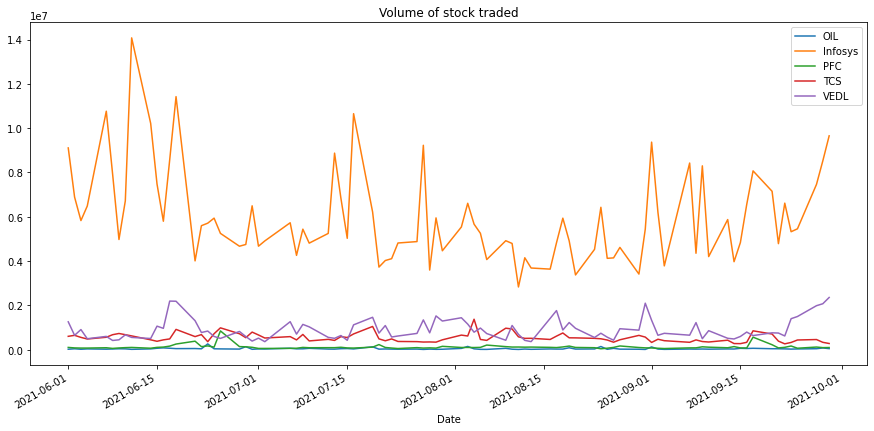

In [19]:
oil['Volume'].plot(label = 'OIL', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
pfc['Volume'].plot(label = "PFC")
tcs['Volume'].plot(label = "TCS")
vedl['Volume'].plot(label = 'VEDL')
plt.title('Volume of stock traded')
plt.legend()

### The Graph shows the volume traded by these companies which clearly shows that stocks of Infosys are traded more compared to other IT stocks.

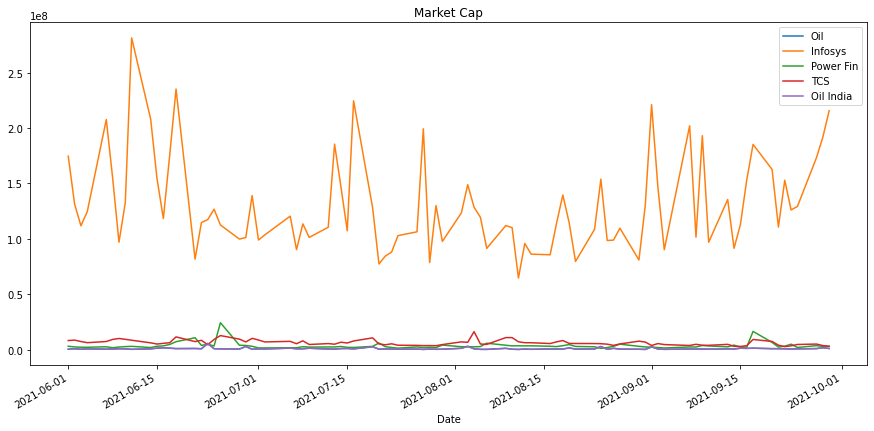

In [20]:
# Market Capitalisation
oil['MarktCap'] = oil['Open'] * oil['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
pfc['MarktCap'] = pfc['Open'] * pfc['Volume']
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
vedl['MarktCap'] = vedl['Open'] * vedl['Volume']
oil['MarktCap'].plot(label = "Oil")
infy['MarktCap'].plot(label = "Infosys")
pfc['MarktCap'].plot(label = 'Power Fin')
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
oil['MarktCap'].plot(label = 'Oil India')
plt.title('Market Cap')
plt.legend()

#### from the graph that Infosys seems to be traded on a higher side.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020223673A90>,
      dtype=object)

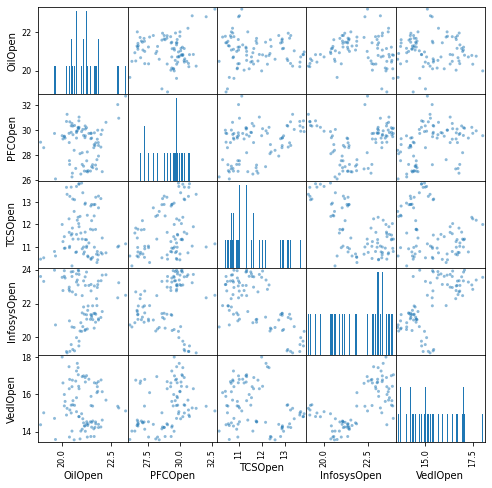

In [21]:
data = pd.concat([oil['Open'], pfc['Open'], tcs['Open'],infy['Open'],vedl['Open']],axis = 1)
data.columns = ['OilOpen','PFCOpen','TCSOpen','InfosysOpen','VedlOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

In [22]:
data.to_excel('saved_file.xlsx')

##### Thank You.

##### Binita K. Mandal